# Principle Component Analysis

Since the merge between the datasets created a lot of columns (over 2,000), it's necesary to reduce the dimensions of the dataset with PCA before running the k-means algorithm.

## Import Statements

In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("bofedales-clean.csv")
df = df.drop(["Unnamed: 0"], axis=1)
df.isna().sum().sum()

np.int64(0)

In [3]:
df.shape

(2534, 2289)

In [4]:
df.head(3)

,Area_m2,AUC,pct_prot,elev_mean_,elev_std_m,n_wells,Ground Water Rights 1966-01-01,Ground Water Rights 1967-01-01,Ground Water Rights 1968-01-01,Ground Water Rights 1969-01-01,...,NDWI 2019-03,NDWI 2019-04,NDWI 2019-05,NDWI 2019-06,NDWI 2019-07,NDWI 2019-08,NDWI 2019-09,NDWI 2019-10,NDWI 2019-11,NDWI 2019-12
0,6300,86.769539,0.0,4162.714286,3.953815,0.0,0.0,0.0,0.0,0.0,...,0.031930,0.026136,0.022087,0.019181,0.023405,0.015355,-0.000504,0.004056,0.014678,0.010436
1,5400,83.176353,0.0,4073.500000,12.406316,0.0,0.0,0.0,0.0,0.0,...,-0.057992,-0.053230,-0.054671,-0.064990,-0.063351,-0.074670,-0.085071,-0.081491,-0.061333,-0.055450
2,6300,103.719438,0.0,4278.571429,6.161102,0.0,0.0,0.0,0.0,0.0,...,0.065899,0.070822,0.070075,0.068015,0.068144,0.062340,0.047670,0.050570,0.056227,0.059294


## Finding the Optimal Number of Principle Components

First, check how many principle components account for 90% of the variance in the data

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)  

In [6]:
x_per_variance = 0.90

pca = PCA(n_components=x_per_variance, svd_solver="full")
X_pca = pca.fit_transform(X_scaled)
print(f"Number of principal components chosen to explain {x_per_variance * 100}% variance: {pca.n_components_}")
print("Explained variance ratio (per PC):")
print(np.round(pca.explained_variance_ratio_, 4))
print("Cumulative explained variance:", round(pca.explained_variance_ratio_.cumsum()[-1], 4))

Number of principal components chosen to explain 90.0% variance: 5
Explained variance ratio (per PC):
[0.7058 0.0929 0.0571 0.0397 0.0334]
Cumulative explained variance: 0.9289


Five PCs account for 90% of the variance, so the data can easily be greatly reduced in dimensionality.

Next, graph variance versus PCs. The elbow in the graph has the optional number of PCs -- afterwards, there are diminishing returns.

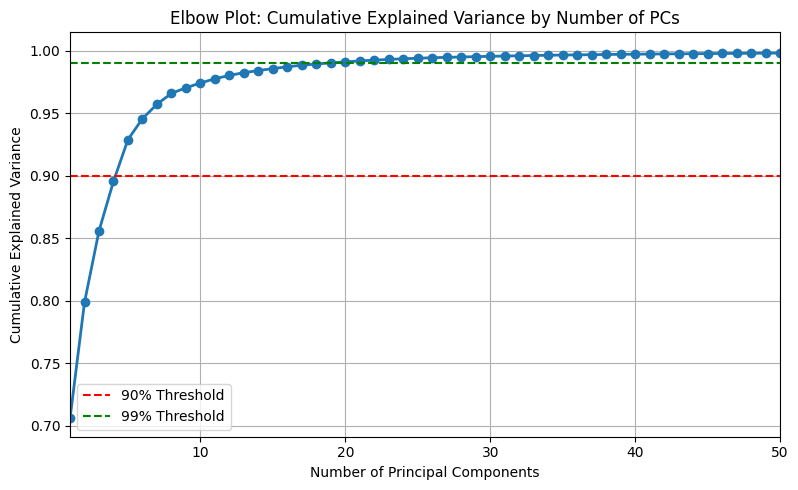

In [7]:
features_for_pca = df.columns.tolist()

pca_full = PCA()
pca_full.fit(X_scaled)

cum_var = np.cumsum(pca_full.explained_variance_ratio_)

# 6) Plot the "elbow" (cumulative explained variance vs. number of components)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cum_var) + 1), cum_var, marker='o', linewidth=2)
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Threshold')
plt.axhline(y=0.99, color='g', linestyle='--', label='99% Threshold')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Elbow Plot: Cumulative Explained Variance by Number of PCs")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.xlim(1, 50)

plt.show()

Since the "elbow" of the curve occurs at around 7 or 6 PCs, this is the value that will be used in analyzing the data

## Run PCA with 6 Components

In [8]:
pca6 = PCA(n_components=6)
X_ = pca6.fit_transform(X_scaled)

Save the dataset to be run in future notebooks:

In [9]:
np.save("scaled-df.npy", X_)